In [37]:
in_colab = 'google.colab' in str(get_ipython())
if in_colab == True:
  !pip install yfinance
  import yfinance as yf
  import numpy as np
  import pandas as pd
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score
  import matplotlib.pyplot as plt
else:
  import yfinance as yf
  import numpy as np
  import pandas as pd
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score
  import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
crypto_btc = yf.download(tickers='BTC-USD', start='2018-01-01', end='2022-12-31').drop(columns=['Adj Close', 'High', 'Low']).round(2).reset_index()
crypto_eth = yf.download(tickers='ETH-USD', start='2018-01-01', end='2022-12-31').drop(columns=['Adj Close', 'High', 'Low']).round(2).reset_index()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
crypto_btc['Percent Change'] = crypto_btc['Close'].pct_change()
crypto_eth['Percent Change'] = crypto_eth['Close'].pct_change()

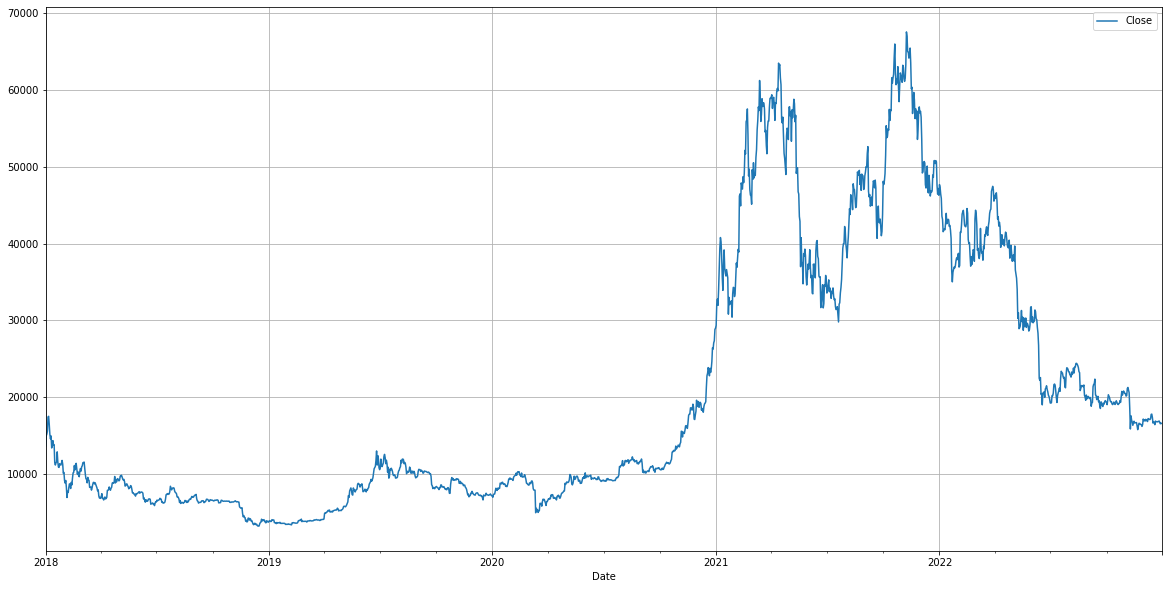

In [28]:
btc_plot = crypto_btc.plot(
    x = 'Date',
    y = 'Close',
    grid = True,
    figsize = (20,10)
)

In [6]:
crypto_btc.head()

,Date,Open,Close,Volume,Percent Change
0,2018-01-01 00:00:00+00:00,14112.2,13657.2,10291200000,NaN
1,2018-01-02 00:00:00+00:00,13625.0,14982.1,16846600192,0.097011
2,2018-01-03 00:00:00+00:00,14978.2,15201.0,16871900160,0.014611
3,2018-01-04 00:00:00+00:00,15270.7,15599.2,21783199744,0.026196
4,2018-01-05 00:00:00+00:00,15477.2,17429.5,23840899072,0.117333


In [7]:
X = crypto_btc.drop(columns=['Date','Percent Change'])
X

,Open,Close,Volume
0,14112.20,13657.20,10291200000
1,13625.00,14982.10,16846600192
2,14978.20,15201.00,16871900160
3,15270.70,15599.20,21783199744
4,15477.20,17429.50,23840899072
...,...,...,...
1820,16842.25,16919.80,11886957804
1821,16919.29,16717.17,15748580239
1822,16716.40,16552.57,17005713920
1823,16552.32,16642.34,14472237479


In [8]:
y = crypto_btc[['Close']]
y

,Close
0,13657.20
1,14982.10
2,15201.00
3,15599.20
4,17429.50
...,...
1820,16919.80
1821,16717.17
1822,16552.57
1823,16642.34


In [21]:
from sklearn.kernel_ridge import KernelRidge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.80, random_state=42)
kr = KernelRidge(kernel= 'linear', alpha = 50-2, degree = 10)
#kr= KernelRidge()
kr.fit(X_train, y_train)
pred_btc = kr.predict(X)
btc_pred = crypto_btc.copy().drop(columns=['Open','Volume', 'Percent Change'])
btc_pred['BTC Predicted Price'] = pred_btc
btc_pred['Price Accuracy']= (btc_pred['BTC Predicted Price']/btc_pred['Close']-1)*100
btc_pred

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


,Date,Close,BTC Predicted Price,Price Accuracy
0,2018-01-01 00:00:00+00:00,13657.20,13670.25,0.095554
1,2018-01-02 00:00:00+00:00,14982.10,14886.00,-0.641432
2,2018-01-03 00:00:00+00:00,15201.00,15176.00,-0.164463
3,2018-01-04 00:00:00+00:00,15599.20,15576.00,-0.148726
4,2018-01-05 00:00:00+00:00,17429.50,17299.50,-0.745862
...,...,...,...,...
1820,2022-12-26 00:00:00+00:00,16919.80,16900.25,-0.115545
1821,2022-12-27 00:00:00+00:00,16717.17,16716.50,-0.004008
1822,2022-12-28 00:00:00+00:00,16552.57,16544.50,-0.048754
1823,2022-12-29 00:00:00+00:00,16642.34,16624.50,-0.107196


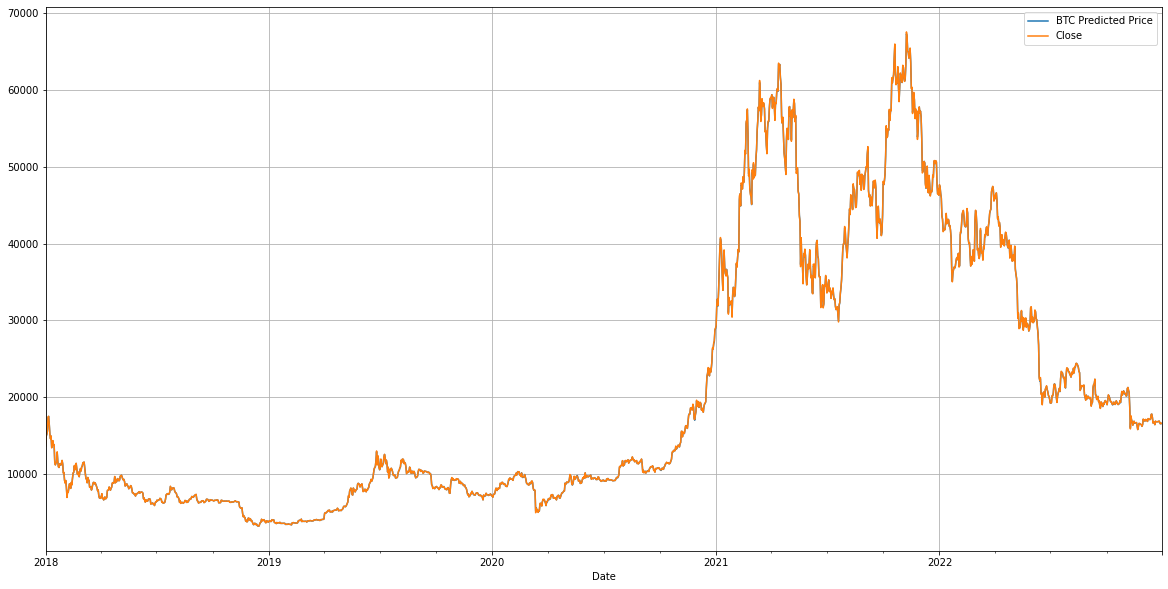

In [36]:
btc_predict_plot = btc_pred.plot(
    x='Date',
    y=['BTC Predicted Price', 'Close'],
    grid = True,
    figsize=(20,10)
)